# Exercises For Session 10 (Scipy)

## Exercise 1: Doing Economics with Scipy

Solve the exercises below to become acquainted with scipy.

### Exercise 1.1: Pooled OLS 
Consider again the function we use to draw data in Session 9. 

In [ ]:
# Initialization
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Setup
np.random.seed(208)
ID            = 20
Periods       = 5
beta          = np.array([1, 0.5, 1.4, 3, 0.2, 5]) # True values

# Define function
def create_data(ID, Periods, beta):
    
    data_mu       = np.array([1, 0.7, -0.25, 0.6, 0.4, -0.1])                                              
    data_var      = [ [ 1.0000,  -0.2962,    0.3144,    0.5061,   -0.0014,   0.0077],
                    [-0.2962,   1.0000,    0.3082,    0.0301,   -0.0101,   0.5034],
                    [ 0.3144,   0.3082,    1.0000,    0.7012,    0.6674,   0.6345],
                    [ 0.5061,   0.0301,    0.7012,    1.0000,    0.1950,   0.2173],
                    [-0.0014,  -0.0101,    0.6674,    0.1950,    1.0000,   0.1860],
                    [ 0.0077,   0.5034,    0.6345,    0.2173,    0.1860,   1.0000] ]                       
    year          = np.sum(np.kron(np.linspace(1,Periods,Periods),np.identity(ID)),0)                      
    idx           = np.sum(np.kron(np.identity(Periods),np.linspace(1,ID,ID)),0)                           
    X             = np.exp(np.array(np.random.multivariate_normal(data_mu, data_var, ID*Periods)))         
    y             = X @ beta + np.random.normal(0,1,ID*Periods)
    data          = np.c_[year, idx, X, y]
    return data

# Call function
data = create_data(ID, Periods, beta)
#print(pd.DataFrame(data)) 

In the last session, we used the fact that the Pooled OLS estimator admits a closed form solution and we estimated the parameters of interests with matrix algebra. However, we can achieve the same result by minimizing the sum of squares residual

\begin{align}
RSS = \sum_{i=1}^{N}(y_i - X_i\beta)^2
\end{align}

Create a new function, call it "SSR", that takes a (6 x 1) vector of parameters as input and produces the RSS formula above as output (Hint: consider using [np.square](https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html). Else, $x^2$ is coded as "x**2"). Pay attention to the fact that the Pooled OLS objective function must return a scalar. Use [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the vector $\beta$ that minimizes the RSS. If you do this correctly, you should get exactly the same point estimates as in Session 9.

### Exercise 1.2: Bertand-Nash Equilibrium
Two firms, $i \in \{1,2\}$, engage in price competition à la Bertand-Nash. Let $\mathbf{p} = [p_1 \ p_2]^T$ and let's assume that consumers' demand reads 

\begin{align}
q_i(\mathbf{p}) = \frac{\exp(\alpha p_{i})}{\sum_{l \in \{1,2\}}\exp(\alpha p_{l})}, \ \ \forall i.
\end{align}

Firms have the same maginal costs, $c>0$. The first order conditions associated with their optimization problem read

\begin{align}
p_i = c - \frac{1}{\alpha(1-q_i(\mathbf{p}))}
\end{align}

Create a new function, call it "FOC", that takes a (2x1) vector of prices as input and produces the FOC above as output. Set $c=2$ and $\alpha = -0.5$. Then, use one of the routines in [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) to find the unique Bertand-Nash equilibrium of this game.

A few hints:

- I recommend to use either [root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root), [least_squares](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) or [fixed_point](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html#scipy.optimize.fixed_point). In the first two cases, you should minimize the following implicit function

\begin{align}
F_i := p_i - c + \frac{1}{\alpha(1-q_i(\mathbf{p}))}
\end{align}

In the third case, you can directly supply the original FOC. Please see the documentation of the two solvers for an explanation. 

- Make sure you explicitly define $q_i(\mathbf{p})$ as a function of *both* $p_1$ and $p_2$ inside the objective function. Remember that the solver has to search for the vector of prices s.t. $ FOC(\mathbf{p}) = \mathbf{p}$.

- Assume that both firms set the same initial prices. In other words, use the same numbers as starting values for the solver (e.g. [0,0]). Note: if you use optimize.least_squares or optimize.root, experiment with asymmetric starting values. The solution must always be symmetrical because firms have the same marginal costs. 

- No matter which solver you use, you should get always the same result. The correct solution is $[p_1 \ p_2]^T = [6 \ 6]^T$.


## Exercise 2: Searching for Global Minima

Consider the following non-linear function
\begin{align}
 f(x) = 2 - 34\sin(x) + x^2.
\end{align}

It clearly admits one global minimum and multiple local minima.

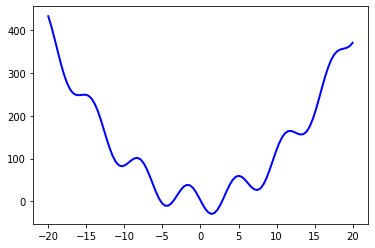

In [286]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define function
def my_fun(x):
    return 2 - 34*np.sin(x) + x**2

# Plot
x = np.linspace(-20,20,100)
y = my_fun(x)
plt.plot(x, y, 'b-', linewidth=2)
plt.show()

Suppose that you use scipy.optimize.minimize to find the value of x that minimizes this function. The solution clearly depends on the starting values that you set.

In [287]:
from scipy.optimize import minimize
x = np.linspace(-20, 20, 10)
for i in x:
    print("The point of minimum attained starting from x = ", round(i,2), "is", minimize(my_fun, i).x)

The point of minimum attained starting from x =  -20.0 is [-4.44768016]
The point of minimum attained starting from x =  -15.56 is [-16.04478232]
The point of minimum attained starting from x =  -11.11 is [-10.34161869]
The point of minimum attained starting from x =  -6.67 is [-4.4476801]
The point of minimum attained starting from x =  -2.22 is [-4.44768016]
The point of minimum attained starting from x =  2.22 is [1.48342487]
The point of minimum attained starting from x =  6.67 is [7.4033948]
The point of minimum attained starting from x =  11.11 is [7.40339483]
The point of minimum attained starting from x =  15.56 is [13.24400339]
The point of minimum attained starting from x =  20.0 is [1.4834249]


Eye-detection suggests that the global minimum is attained at $x=1.4834249$. Use one of the global optimization routines in scipi.optimize, e.g. [brute](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute), to find the unique global minimum of the function.